

# 1. Import the required libraries

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np 
from scipy import stats 
from sklearn import datasets 
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,  QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.interpolate import interp1d
import numpy.ma as ma
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist



# 2. Load the required Dataset

First we need to load the dataset, based on 82(77) features, and 1080 data rows.

In [2]:
X = pd.read_excel("Data_Cortex_Nuclear.xls")
n_samples = X.shape[0]

X_target = X.iloc[: , 81]
#X_target = pd.read_excel("Data_Cortex_Nuclear.xls", parse_cols = [81])
#print(X_target)

from collections import Counter

classes = []
classes = list(Counter(X_target).keys())
print(classes) # equals to list(set(words))
#print(Counter(X_target).values()) # counts the elements' frequency

X = X.drop(["MouseID", "Genotype", "Treatment", "Behavior", "class"], axis = 1)

X = np.where(np.isnan(X), ma.array(X, mask=np.isnan(X)).mean(axis=0), X) 
#interpolate NaN (missing) data with the mean of the feature

['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m', 't-CS-s', 't-SC-s']


# 3. Visualizations using PCA and t-SNE

### 3.1 PCA

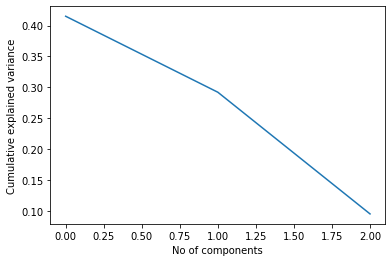

In [3]:
pca = PCA(n_components = 3)
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')
plt.show()

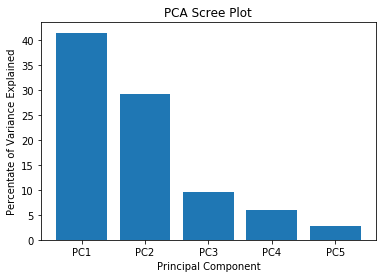

In [4]:
pca = PCA(n_components = 5)
pca.fit(X)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

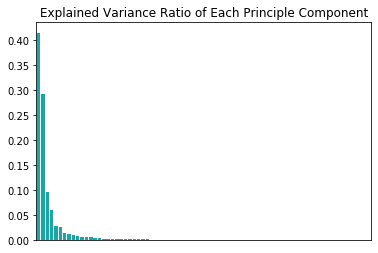

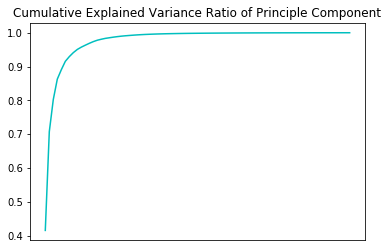

Cumulative variance of 80% reached at component 2


In [5]:
pca = PCA(n_components = None)
pca.fit(X)
X_new = pca.transform(X)
plt.figure()
sns.barplot(x=np.arange(X.shape[1]),y=pca.explained_variance_ratio_, color="c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()

plt.figure()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(X.shape[1]),cumulative_explained_variance, color="c")
plt.xticks([])
plt.title("Cumulative Explained Variance Ratio of Principle Component")
plt.show()
res = list(map(lambda i: i> 0.8, cumulative_explained_variance)).index(True) 
print("Cumulative variance of 80% reached at component", res)

after scaling minimum [-1.12689408 -1.48002603 -4.13675024 -2.78794383 -2.26160697 -4.08910164
 -4.36440375 -1.69644483 -3.06709178 -2.14499483 -1.15110086 -5.03828281
 -2.42635269 -4.73577468 -2.76561798 -2.37470409 -4.66392135 -1.99110651
 -5.21282564 -4.85712438 -1.08629302 -2.87815278 -2.53996285 -2.03024828
 -2.0587626  -4.18127672 -5.7729756  -3.06886714 -4.09975587 -2.17273347
 -2.77128156 -2.34239835 -1.16235233 -3.84469021 -2.10302433 -4.84759511
 -4.28089199 -2.27256269 -4.32236527 -2.72613627 -2.23794073 -2.69237163
 -1.68946845 -2.15421934 -3.46726434 -3.17297076 -1.91608639 -2.97830372
 -2.17663907 -1.84833196 -0.88517014 -7.17168345 -5.68515003 -3.80287613
 -3.73479254 -3.27475733 -1.65641936 -2.62905165 -3.16805382 -2.00876033
 -2.96694982 -2.79450129 -2.80292541 -4.04731164 -2.42711275 -2.81617668
 -2.87871472 -2.44368384 -2.63186185 -2.30153673 -3.80287613 -1.98341505
 -2.82294042 -1.65911603 -2.14095417 -2.15732583 -2.37020146]


Text(0, 0.5, 'Second principal component')

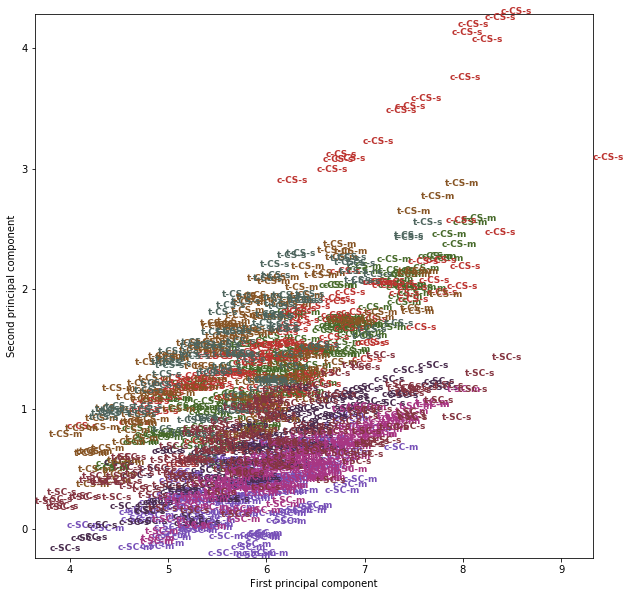

In [6]:
# build a PCA model
scaler=StandardScaler()
scaler.fit(X) 
X_scaled=scaler.transform(X)
print ("after scaling minimum", X_scaled.min(axis=0))
#scale data to be able to perform pca on it

pca=PCA(n_components=2) 
pca.fit(X_scaled) 
# transform the digits data onto the first two principal components
digits_pca = pca.transform(X)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

 
for i in range(len(X)):
    c = X_target[i];
    idx = 0;
    for cl in classes:
        if cl == c:
            break;
        else:
            idx += 1
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(X_target[i]),
    color = colors[idx],
    fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### 3.2 t - SNE

Text(0.5, 0, 't-SNE feature 1')

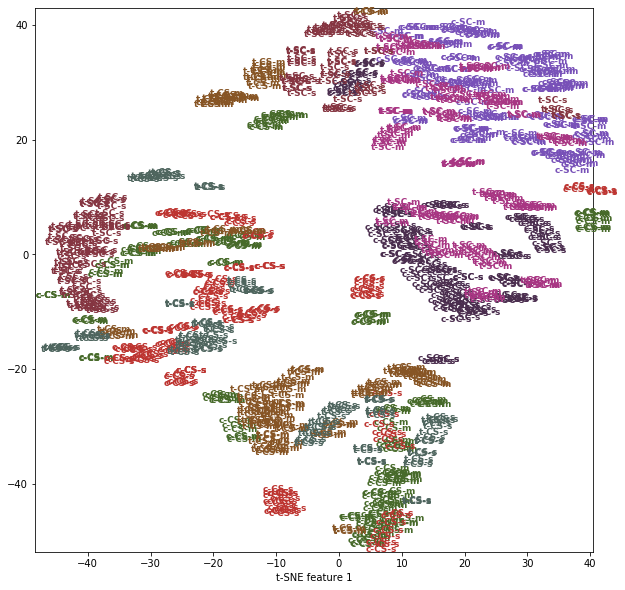

In [7]:
tsne = TSNE(random_state=180, perplexity=30)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(X)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)


for i in range(len(X)):
    c = X_target[i];
    idx = 0;
    for cl in classes:
        if cl == c:
            break;
        else:
            idx += 1
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(X_target[i]),
    color = colors[idx],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

### 3.3 Principal components


after scaling minimum [-1.12689408 -1.48002603 -4.13675024 -2.78794383 -2.26160697 -4.08910164
 -4.36440375 -1.69644483 -3.06709178 -2.14499483 -1.15110086 -5.03828281
 -2.42635269 -4.73577468 -2.76561798 -2.37470409 -4.66392135 -1.99110651
 -5.21282564 -4.85712438 -1.08629302 -2.87815278 -2.53996285 -2.03024828
 -2.0587626  -4.18127672 -5.7729756  -3.06886714 -4.09975587 -2.17273347
 -2.77128156 -2.34239835 -1.16235233 -3.84469021 -2.10302433 -4.84759511
 -4.28089199 -2.27256269 -4.32236527 -2.72613627 -2.23794073 -2.69237163
 -1.68946845 -2.15421934 -3.46726434 -3.17297076 -1.91608639 -2.97830372
 -2.17663907 -1.84833196 -0.88517014 -7.17168345 -5.68515003 -3.80287613
 -3.73479254 -3.27475733 -1.65641936 -2.62905165 -3.16805382 -2.00876033
 -2.96694982 -2.79450129 -2.80292541 -4.04731164 -2.42711275 -2.81617668
 -2.87871472 -2.44368384 -2.63186185 -2.30153673 -3.80287613 -1.98341505
 -2.82294042 -1.65911603 -2.14095417 -2.15732583 -2.37020146]

shape of X_pca (1080, 2)
[0.59788582 0.

Text(0, 0.5, 'PC2')

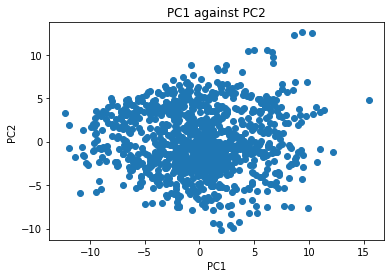

In [8]:
scaler=StandardScaler()
scaler.fit(X) 
X_scaled=scaler.transform(X)
print ("after scaling minimum", X_scaled.min(axis=0))
#scale data to be able to perform pca on it

pca=PCA(n_components=2) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
print ("\nshape of X_pca", X_pca.shape)
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio)

X_pca = np.delete(X_pca, np.s_[2:3], axis=1)
print(X_pca)
principalDataframe = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

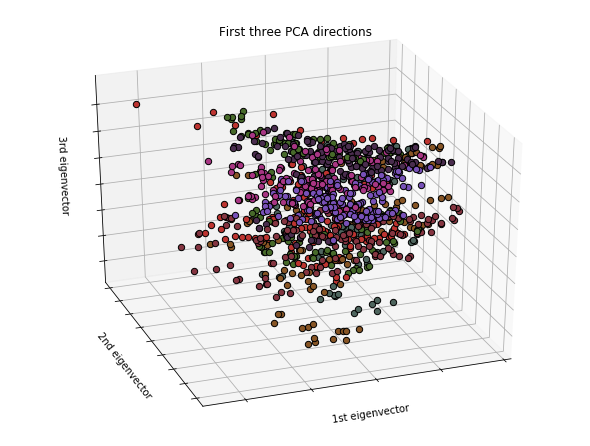

In [9]:
# build a PCA model
pca = PCA(n_components=3)
pca.fit(X)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(X)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
for i in range(len(X)):
#     # actually plot the digits as text instead of using scatter
#     ax.text(digits_pca[i, 0], digits_pca[i, 1], digits_pca[i, 2], str(digits.target[i]),
#     color = colors[digits.target[i]],
#     fontdict={'weight': 'bold', 'size': 9})
    c = X_target[i];
    idx = 0;
    for cl in classes:
        if cl == c:
            break;
        else:
            idx += 1
    ax.scatter(digits_pca[i, 0], digits_pca[i, 1],digits_pca[i, 2], c=colors[idx], edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

              X          Y
0      0.142193 -46.443867
1      0.027414 -46.049366
2     -0.063692 -46.002243
3    -17.929258 -32.630756
4    -18.040510 -32.186192
...         ...        ...
1075 -44.745792  -4.771454
1076 -44.545059  -4.303082
1077 -44.169876  -7.589599
1078 -44.583744  -7.032363
1079 -44.881634  -5.162756

[1080 rows x 2 columns]


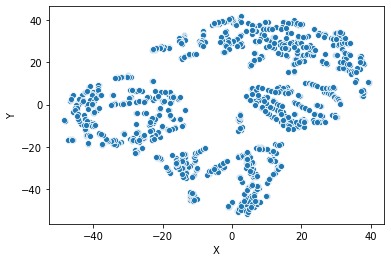

In [10]:

tsne1 = TSNE(random_state=180, perplexity=30)
# use fit_transform instead of fit, as TSNE has no transform method
genes_tsne = tsne1.fit_transform(X)
tsne_X = pd.DataFrame({'X':genes_tsne[:,0],
                        'Y':genes_tsne[:,1]})
print(tsne_X)
sns.scatterplot(x="X", y="Y",
              data=tsne_X);

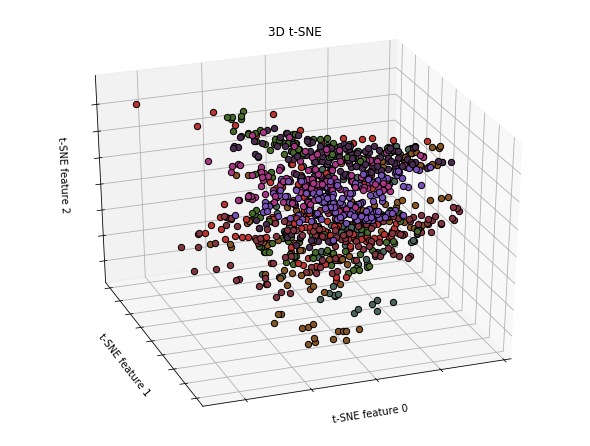

In [11]:
tsne = TSNE(random_state=42, n_components = 3 )
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(X)
fig = plt.figure(figsize=(8, 6))
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
ax = Axes3D(fig, elev=-150, azim=110)
for i in range(len(X)):
    c = X_target[i];
    idx = 0;
    for cl in classes:
        if cl == c:
            break;
        else:
            idx += 1
    ax.scatter(digits_pca[i, 0], digits_pca[i, 1],digits_pca[i, 2], c=colors[idx], edgecolor='k', s=40)
ax.set_title("3D t-SNE")
ax.set_xlabel("t-SNE feature 0")
ax.set_ylabel("t-SNE feature 1")
ax.set_zlabel("t-SNE feature 2")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

# 4. K - means

[1 1 1 ... 0 0 2]


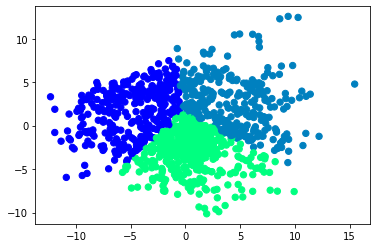

In [12]:
scaler=StandardScaler()
scaler.fit(X) 
X_scaled=scaler.transform(X)
pca=PCA(n_components=2) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 

kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(X_pca).predict(X_pca)
print(labels)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='winter');




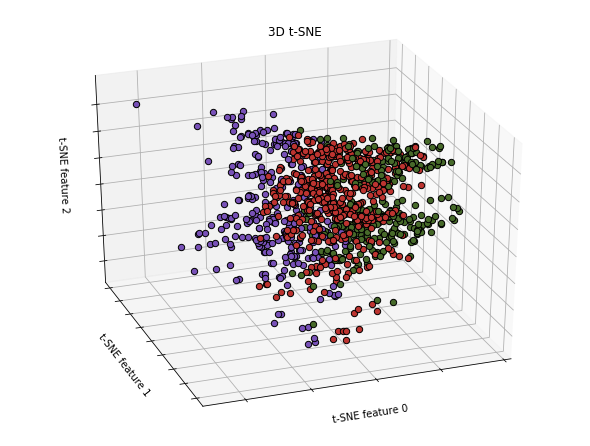

In [13]:
tsne2 = TSNE(random_state=42, n_components = 3 )
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne2.fit_transform(X)
fig = plt.figure(figsize=(8, 6))
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
ax = Axes3D(fig, elev=-150, azim=110)
for i in range(len(X)):
    ax.scatter(digits_pca[i, 0], digits_pca[i, 1],digits_pca[i, 2], c=colors[labels[i]], edgecolor='k', s=40)
ax.set_title("3D t-SNE")
ax.set_xlabel("t-SNE feature 0")
ax.set_ylabel("t-SNE feature 1")
ax.set_zlabel("t-SNE feature 2")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

### 4.1 We plot the iterations of the k-means for different random initializations of the parameters on a simulated dataset, using the k-means++ algorithm for initialization can severely help the problem of bad initialization as well as lower the number of initializations needed


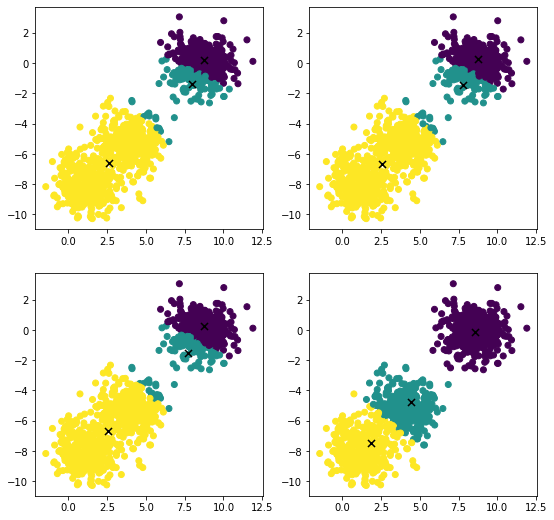

In [14]:
n_samples = 1080
random_state = 180
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

iterations = [1,2,3,10]

fig2 = plt.figure(figsize=(9, 9))
plt.title("K-means iterations")
for i in range(len(iterations)):
    plt.subplot(2, 2, i+1)
    estimator = KMeans(init='random', n_clusters=3, random_state=180, n_init=1, max_iter=iterations[i])
    y_pred = estimator.fit_predict(X) 

    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

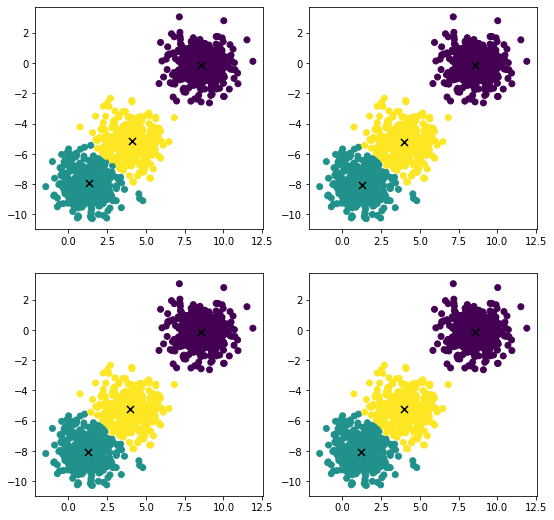

In [15]:
n_samples = 1080
random_state = 180
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

iterations = [1,2,3,10]

fig2 = plt.figure(figsize=(9, 9))
plt.title("K-means iterations")
for i in range(len(iterations)):
    plt.subplot(2, 2, i+1)
    estimator = KMeans(init='k-means++', n_clusters=3, random_state=180, n_init=1, max_iter=iterations[i])
    y_pred = estimator.fit_predict(X) 
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

### 4.2 Finding the best K by plotting the Within Cluster Variation (or Sum of Squared Errors) and the Between Cluster Variation such that there is an elbow in the WCV, with the BCV remaining high

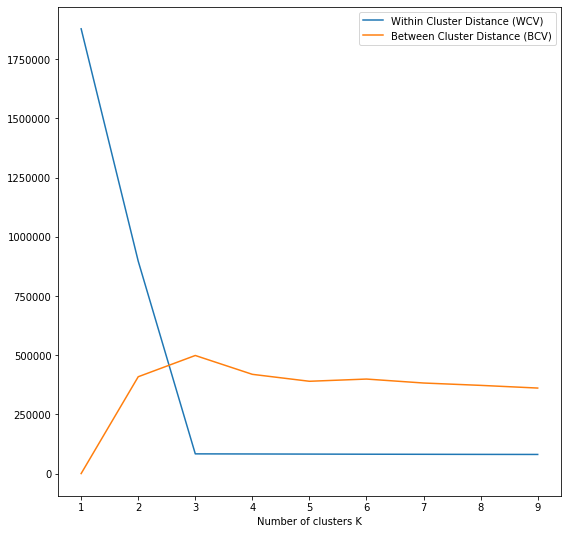

In [16]:
fig1 = plt.figure(figsize=(9, 9))
wcv = {}
bcv = {}
X, y = make_blobs(n_samples=1080,
                  n_features=77,
                  centers=3,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=180) 

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(X)
    wcv[k] = kmeans.inertia_ 
    centers = kmeans.cluster_centers_
    BCV = 0
    for i in range(len(centers)):
        for j in range(len(centers)):
            BCV += distance.euclidean(centers[i], centers[j])**2
    if(k==1):
        bcv[1] = 0
    else:
        bcv[k] = BCV/(k*(k-1))*100
plt.plot(list(wcv.keys()), list(wcv.values()), label="Within Cluster Distance (WCV)")
plt.plot(list(bcv.keys()), list(bcv.values()), label="Between Cluster Distance (BCV)")
plt.xlabel("Number of clusters K")
plt.legend()
plt.show()

# 5. GMM

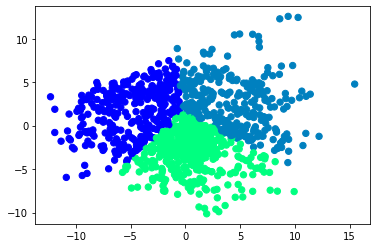

In [17]:
gmm = GaussianMixture(n_components=3).fit(X_pca)
labels1 = gmm.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='winter');

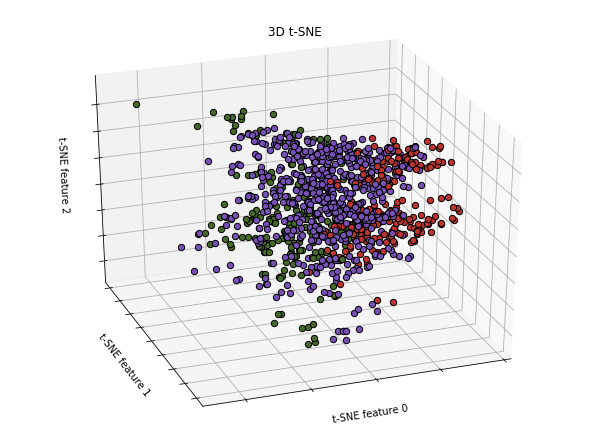

In [18]:
tsne3 = TSNE(random_state=42, n_components = 3 )
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne3.fit_transform(X)
fig = plt.figure(figsize=(8, 6))
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
ax = Axes3D(fig, elev=-150, azim=110)
for i in range(len(X)):
    ax.scatter(digits_pca[i, 0], digits_pca[i, 1],digits_pca[i, 2], c=colors[labels1[i]], edgecolor='k', s=40)
ax.set_title("3D t-SNE")
ax.set_xlabel("t-SNE feature 0")
ax.set_ylabel("t-SNE feature 1")
ax.set_zlabel("t-SNE feature 2")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

# 6. Conclusion

We have obtained that 80% of the variance in the data is explained by the first two principal components and that the first two principal components describe almost the whole variance. Therefore, creating PCA model with the first two components would be enough. However, at the end we see that we obtain better visualization of the clusters of the data using t-SNE. Using K-means and GMM we obtain similar results for the clustering.